In [1]:
#importing the required librabies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS_AMZAD\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#uploading the dataset

df = pd.read_csv("C:/Users/ASUS_AMZAD/Downloads/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2>1.Generate summary statistics (mean, median, std, etc.).</h2>

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h2>2.Create histograms and boxplots for numeric features.</h2>

In [5]:
numeric_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']

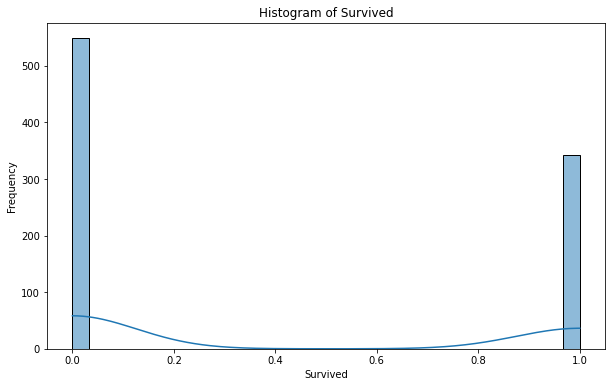

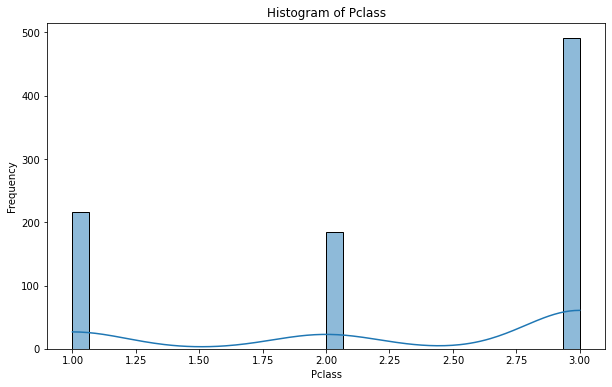

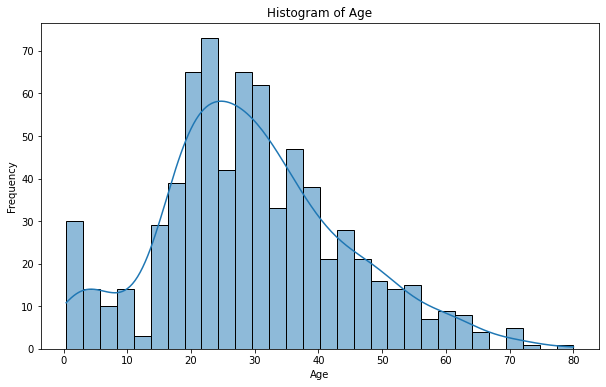

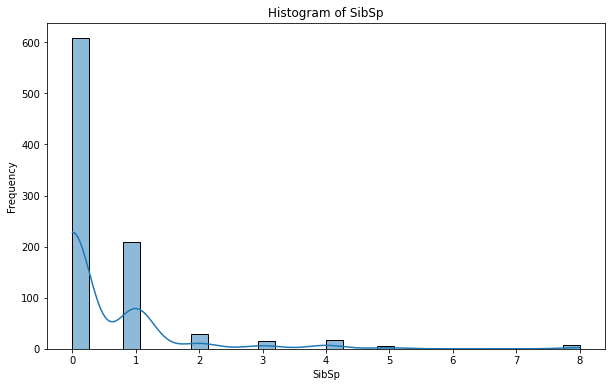

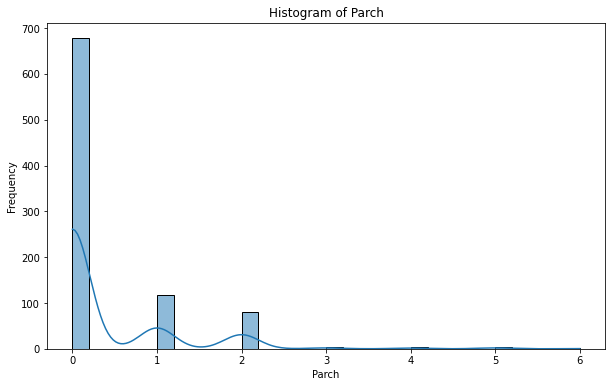

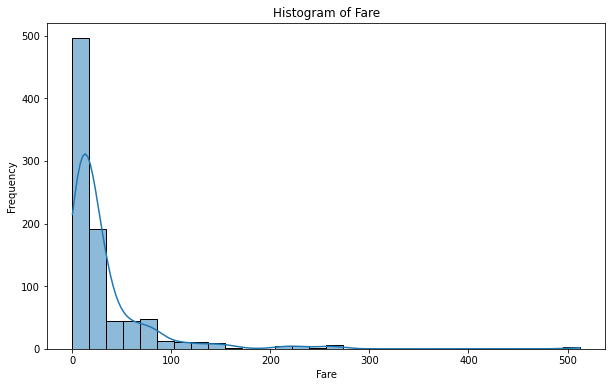

In [6]:
#Histogram for numeric columns

for col in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

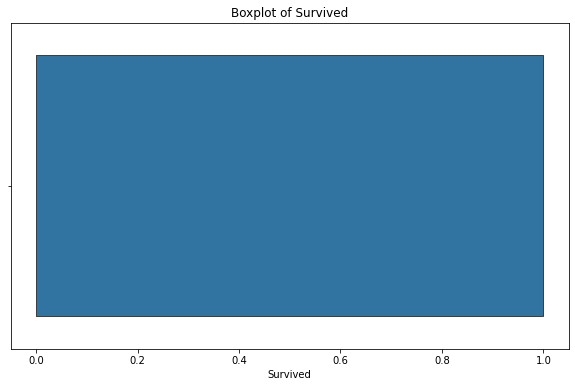

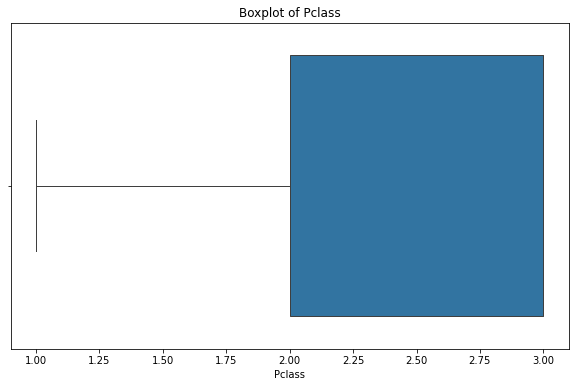

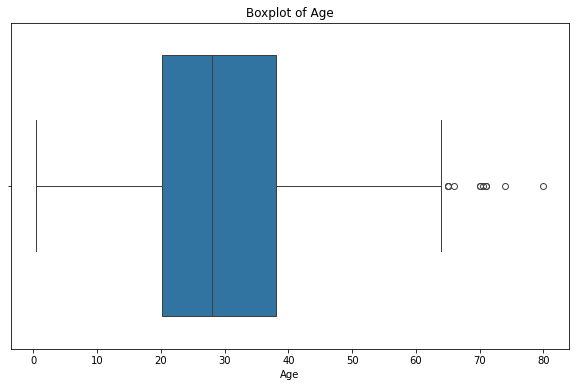

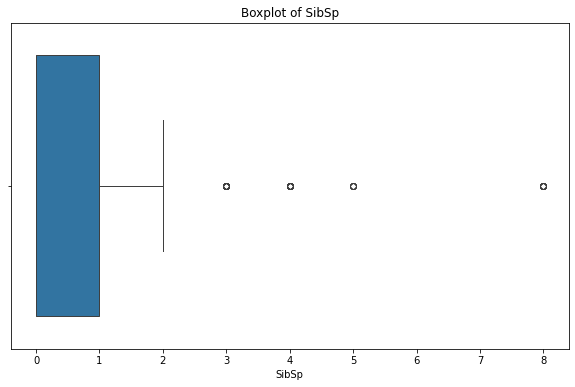

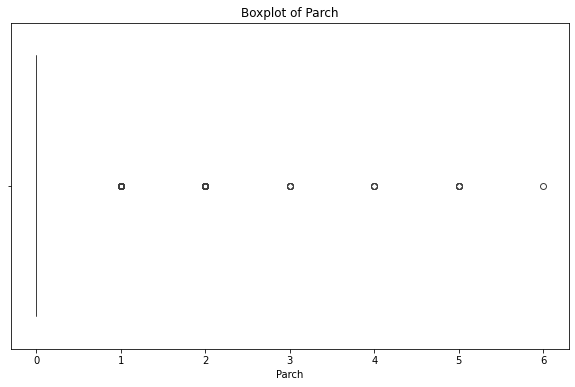

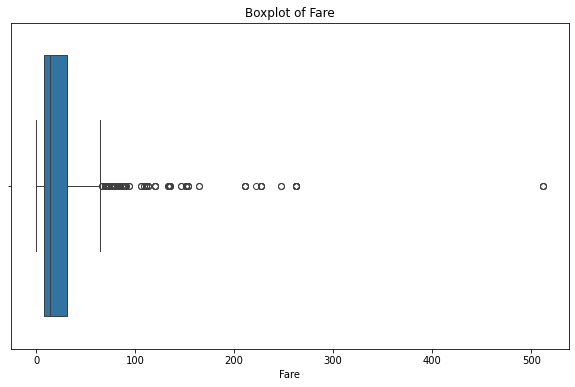

In [7]:
#Boxplots of numerical columns

for col in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

<h2>3.Use pairplot/correlation matrix for feature relationships.</h3>

C:\Users\ASUS_AMZAD\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


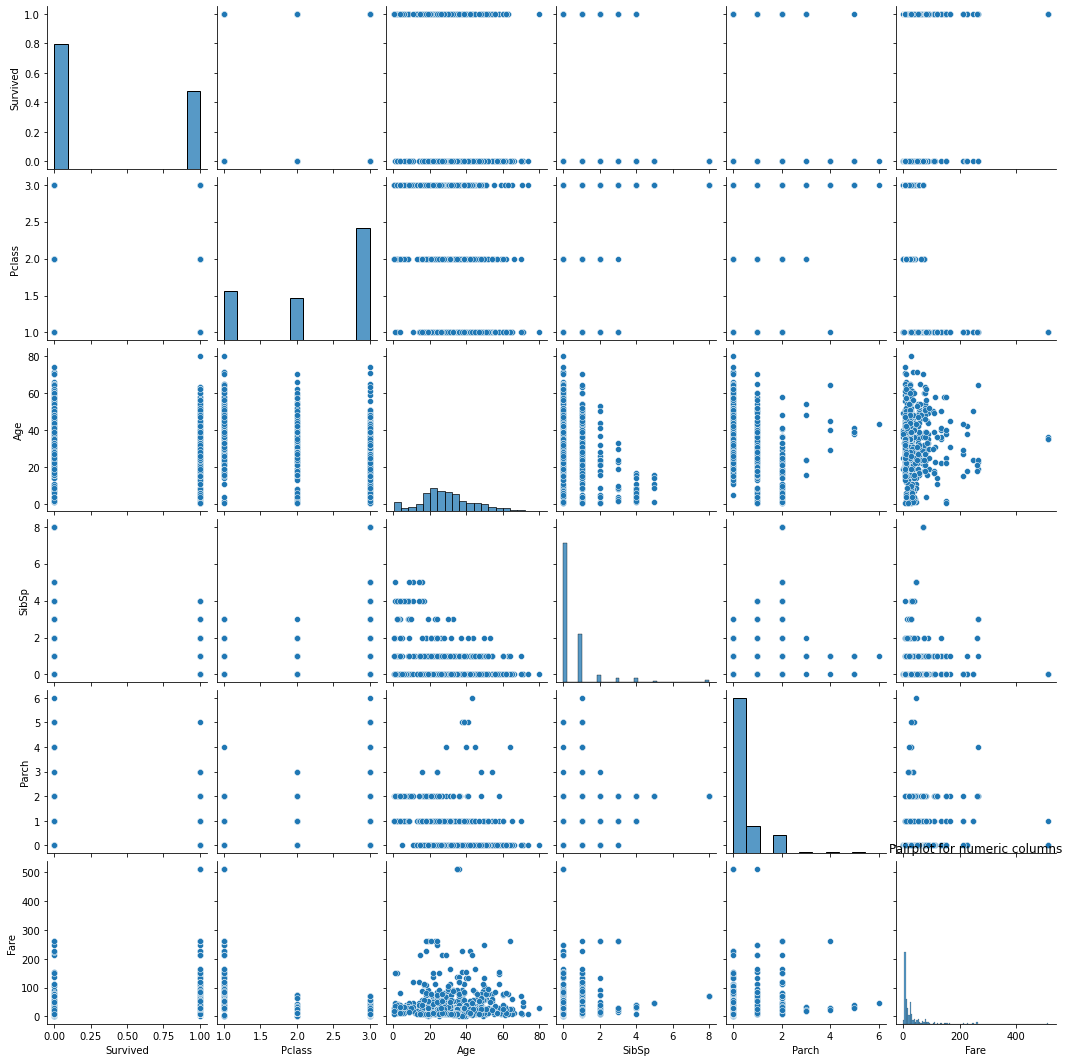

In [9]:
#pairplot for numerical columns

sns.pairplot(df[numeric_cols])
plt.title("Pairplot for numeric columns", y=1.02)
plt.show()

In [11]:
#Correlation matrix for numerical columns

corr_matrix = df[numeric_cols].corr()

corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


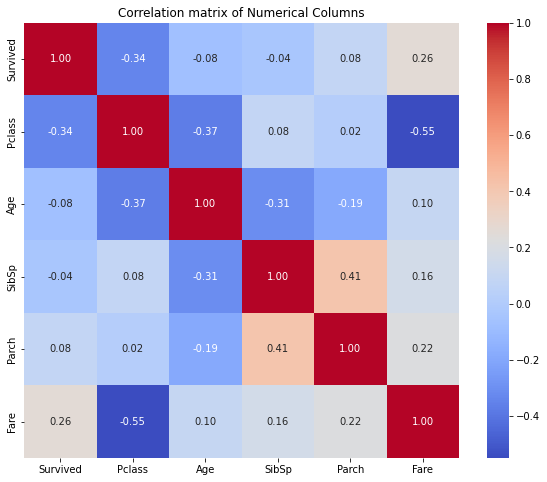

In [12]:
#heatmap of the calculated correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation matrix of Numerical Columns")
plt.show()

<h2> 4.Identify patterns, trends, or anomalies in the data.</h2>

In [13]:
#survival rate by gender

df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [14]:
#survival by passenger class

df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [15]:
#children survival rate

df['Child'] = df['Age']<10
df.groupby('Child')['Survived'].mean()

Child
False    0.366707
True     0.612903
Name: Survived, dtype: float64

In [16]:
#Anomalies in the dataset

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Child            0
dtype: int64

<p>Anomaly: 'Cabin' has many missing values. 'Age' and 'Embarked' also have nulls.</p>

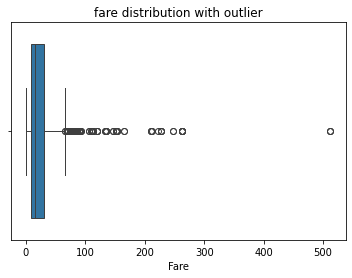

In [18]:
#Outlier: visualize fair distribution

sns.boxplot(x= df['Fare'])
plt.title("fare distribution with outlier")
plt.show()

<p>Anomaly: A few passengers paid extremely high fares (e.g. > $500).</p>

In [20]:
#Correlation between family size and survival

df['FamilySize'] = df['SibSp'] + df['Parch'] +1
df.groupby('FamilySize')['Survived'].mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [21]:
# Survival rate by Embarked

df.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<h2>5.Make basic feature-level inferences from visuals.</h2>

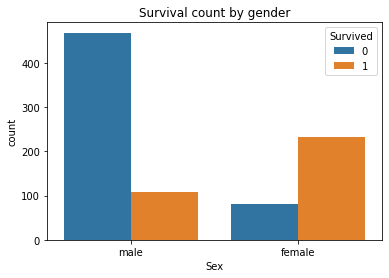

In [22]:
#Survival by gender

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival count by gender")
plt.show()

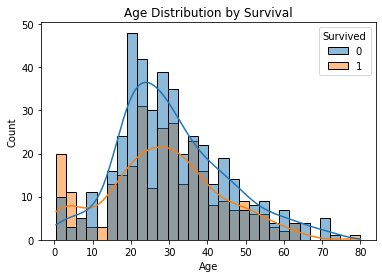

In [23]:
# Age distribution of Survivor Vs Non-Survivor

sns.histplot(data=df, x="Age", hue="Survived", bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

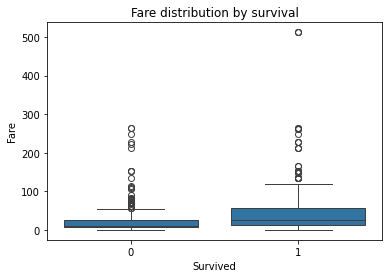

In [24]:
#Fare vs Survival

sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare distribution by survival")
plt.show()

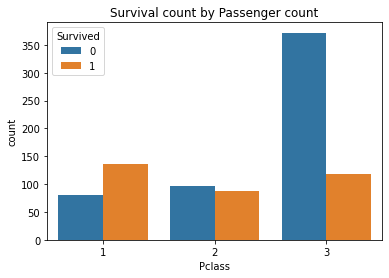

In [25]:
#Pclass vs Survival

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival count by Passenger count")
plt.show()

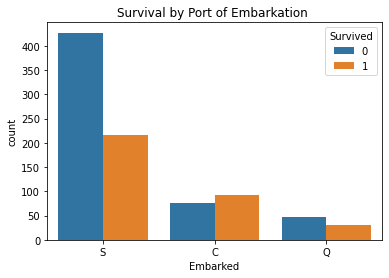

In [26]:
#Survival rate by embarkation rate

sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Survival by Port of Embarkation ")
plt.show()